In [98]:
# loading libraries
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [80]:
# load data
data = pd.read_csv(r"D:\AI\LibrariesForAI\Supervised_learning\9_Logistic_Regression_multiclass\breast_cancer_data.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [81]:
data.shape

(569, 33)

In [82]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [83]:
data.drop(['id','Unnamed: 32'],axis=1,inplace=True)

In [84]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [85]:
# map function for mapping benign into 0 and malignant into 1
data['diagnosis'] = data['diagnosis'].map({'B':0,'M':1})

In [86]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [87]:
X=data.drop(['diagnosis'],axis=1)
y=data['diagnosis']

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=42)

In [89]:
# LogisticRegression:
clf=LogisticRegression()
clf.fit(X_train,y_train)
score=clf.score(X_train,y_train)
print(f"train score for {clf.__class__.__name__} is {score}") 
score=clf.score(X_test,y_test)
print(f"test score for {clf.__class__.__name__} is  {score}")

print("\n")

train score for LogisticRegression is 0.9553805774278216
test score for LogisticRegression is  0.9574468085106383




c:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [90]:
# Random Forest:
clf=RandomForestClassifier()
clf.fit(X_train,y_train)
score=clf.score(X_train,y_train)
print(f"train score for {clf.__class__.__name__} is {score}") 
score=clf.score(X_test,y_test)
print(f"test score for {clf.__class__.__name__} is  {score}")

print("\n")

train score for RandomForestClassifier is 1.0
test score for RandomForestClassifier is  0.9574468085106383




In [91]:
# root is most information gain feature
### to take most important feature
clf.feature_importances_

array([0.04515669, 0.01113931, 0.03997332, 0.02657312, 0.00339186,
       0.00730218, 0.05873927, 0.1252265 , 0.00534819, 0.00460263,
       0.02184206, 0.0055647 , 0.00600142, 0.03297371, 0.00543622,
       0.00464925, 0.00547791, 0.00598537, 0.00581516, 0.0070738 ,
       0.10135792, 0.01853232, 0.07957815, 0.09923859, 0.0092994 ,
       0.02255422, 0.05060064, 0.17057281, 0.01514498, 0.0048483 ])

In [93]:
# to convert as dataframe
pd.Series(clf.feature_importances_,index=clf.feature_names_in_)

radius_mean                0.045157
texture_mean               0.011139
perimeter_mean             0.039973
area_mean                  0.026573
smoothness_mean            0.003392
compactness_mean           0.007302
concavity_mean             0.058739
concave points_mean        0.125226
symmetry_mean              0.005348
fractal_dimension_mean     0.004603
radius_se                  0.021842
texture_se                 0.005565
perimeter_se               0.006001
area_se                    0.032974
smoothness_se              0.005436
compactness_se             0.004649
concavity_se               0.005478
concave points_se          0.005985
symmetry_se                0.005815
fractal_dimension_se       0.007074
radius_worst               0.101358
texture_worst              0.018532
perimeter_worst            0.079578
area_worst                 0.099239
smoothness_worst           0.009299
compactness_worst          0.022554
concavity_worst            0.050601
concave points_worst       0

In [97]:
feature_imp=pd.Series(clf.feature_importances_,index=clf.feature_names_in_).sort_values(ascending=False)

In [96]:
# we can remove the features from smoothness_worst..because they are having negligible values of information gain

<AxesSubplot:>

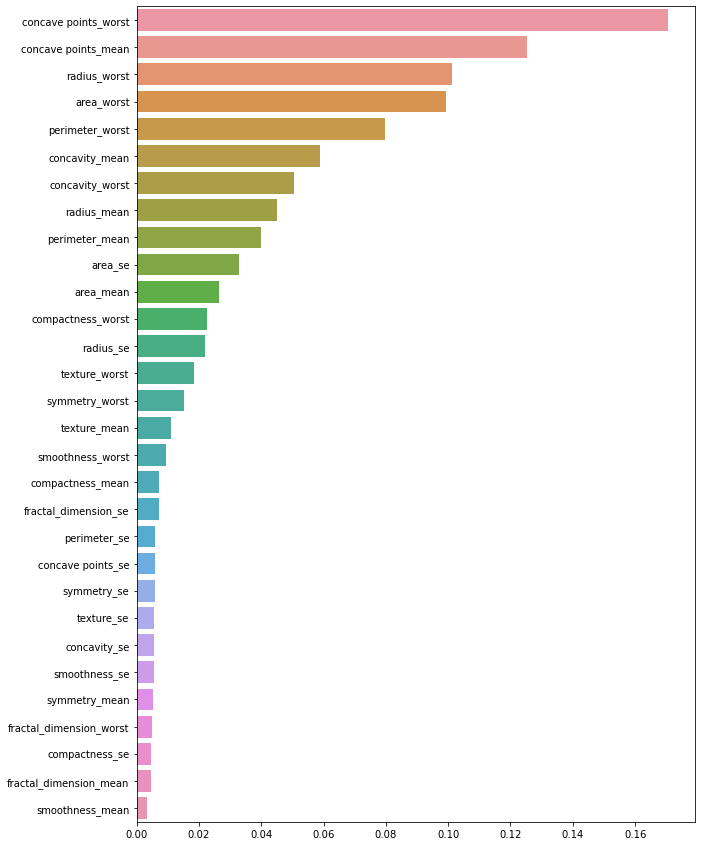

In [102]:
# plotting the graph
plt.figure(figsize=(10,15))
sns.barplot(x=feature_imp,y=feature_imp.index)